# COMP5318 Assignment 1: Classification

### Group number: A1part2 6  , SID1: 520080414   

In [50]:
# Import all libraries
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re, string

In [36]:
# Load dataset
df = pd.read_csv('training.300000.processed.noemoticon.csv')

print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (300000, 6)


,sentiment,id,date,query,username,text
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [37]:
# Pre-process dataset

df_tweet = df[['sentiment', 'text']]
df_tweet['sentiment'] = df_tweet['sentiment'].replace(4, 1)

positive = df_tweet[df_tweet['sentiment'] == 1]
negative = df_tweet[df_tweet['sentiment'] == 0]

#Only retaining some data from each output group
positive = positive.iloc[:16000]
negative = negative.iloc[:16000]

df_tweet = pd.concat([positive, negative])
len(df_tweet)

C:\Users\FU\AppData\Local\Temp\ipykernel_8880\1138654609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['sentiment'] = df_tweet['sentiment'].replace(4, 1)


32000

In [38]:
# nltk.download('all')

In [39]:
#Data cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # miniscule
    text = text.lower()

    # removing usernames
    text = re.sub('@[^\s]+', '', text)

    # removing links
    text = re.sub('((https?://[^\s]+)|(www\.[^\s]+))','',text)

    # removing punctuation
    text = text.translate(str.maketrans('','',string.punctuation))

    # tokenization
    tokens = word_tokenize(text)

    # suppression of stop words and lemmatization
    word_net = WordNetLemmatizer()
    final_words = []
    for token in tokens:
      # suppression of stop words
      if token not in stop_words and len(token) > 1:
        lemm = word_net.lemmatize(token)
        final_words.append(lemm)
    return ' '.join(final_words)

In [51]:
start_time = time()
df_tweet['cleaned_text'] = df_tweet['text'].apply(lambda x: clean_text(x))
print('Cleaning time:', time() - start_time)
df_tweet.head()

time: 2.8772692680358887


,sentiment,text,cleaned_text
6,1,on lunch....dj should come eat with me,lunchdj come eat
9,1,@mrstessyman thank you glad you like it! There...,thank glad like product review bit site enjoy ...
10,1,@PerezHilton Zach makes me pee sitting down! A...,zach make pee sitting im grown gay man
11,1,to sum up my day in one word ......... kackered!,sum day one word kackered
12,1,@k9wkj Great minds think alike,great mind think alike


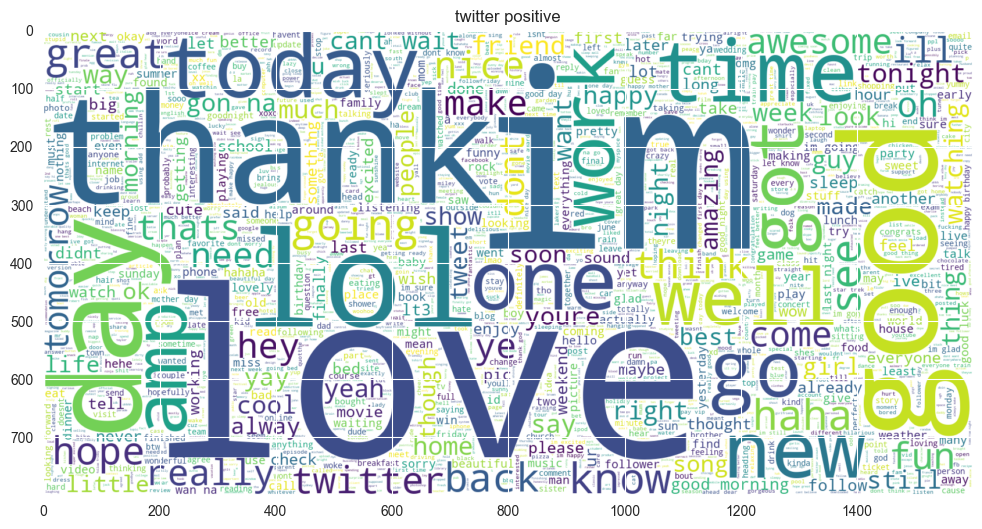

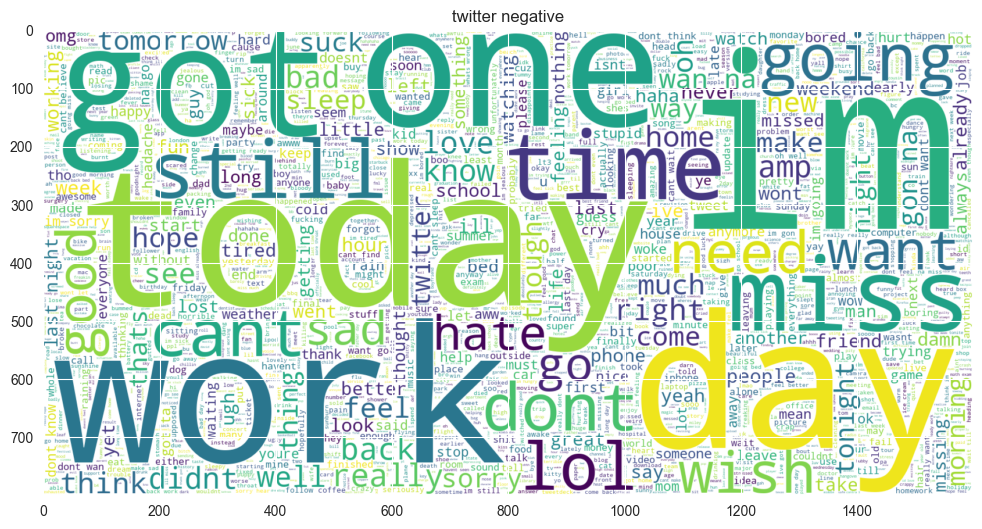

In [60]:
#Generate Word Cloud and separating out positive and negative words

def word_cloud_draw(sentiments, colors,titles):
    plt.figure(figsize=(12, 12))
    word_cloud = WordCloud(max_words = 2000, width = 1600, height = 800, background_color = colors).generate(" ".join(df_tweet[df_tweet.sentiment == sentiments].cleaned_text))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(titles)

color = 'white'
title_positive = 'twitter positive'
title_negative = 'twitter negative'

word_cloud_draw(1, color, title_positive)
word_cloud_draw(0, color, title_negative)

In [43]:
#Splitting dataset in train and test

#split data as 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(df_tweet['cleaned_text'].values, df_tweet['sentiment'].values, test_size=0.2, random_state=1)
print("x_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", X_test.shape)
print("y_test : ", y_test.shape)

x_train :  (25600,)
y_train :  (25600,)
x_test :  (6400,)
y_test :  (6400,)


In [44]:
#Vectorization with CountVectorizer and classification

count_vectorizer = CountVectorizer()

count_vec_train = count_vectorizer.fit_transform(X_train)
# count_vec_test = count_vectorizer.fit_transform(X_test)
count_vec_test = count_vectorizer.transform(X_test)

print("count_train : ", count_vec_train.shape)
print("count_test : ", count_vec_test.shape)

count_train :  (25600, 25930)
count_test :  (6400, 25930)


In [45]:
#Vectorization with Tfidf (Term Frequency - Inverse Document)

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

print("count_train : ", tfidf_train.shape)
print("count_test : ", tfidf_test.shape)

count_train :  (25600, 25930)
count_test :  (6400, 25930)


In [63]:
# Classification with Random Forest

np.random.seed(0)

random_forest = RandomForestClassifier()
random_forest = random_forest.fit(count_vec_train, y_train)

y_pred = random_forest.predict(count_vec_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_confusion = confusion_matrix(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)

print(f'Accuracy: {round(rf_accuracy*100,2)}%')
print(f'Confusion Matrix:',rf_confusion)
print(f'Precision: {round(rf_precision*100,2)}%')
print(f'Recall: {round(rf_recall*100,2)}%')

# pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'])

Accuracy: 73.81%
Confusion Matrix: [[2336  833]
 [ 843 2388]]
Precision: 74.14%
Recall: 73.91%


In [69]:
# Classification with Random Forest
def random_forest_classifier():
    np.random.seed(0)

    random_forest = RandomForestClassifier()
    random_forest = random_forest.fit(count_vec_train, y_train)

    y_pred = random_forest.predict(count_vec_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [ ]:
#Classification using Logistic Regression
def logistic_regression():
    np.random.seed(0)

    logistic = LogisticRegression(max_iter=100, solver='liblinear')
    logistic = logistic.fit(count_vec_train, y_train)

    y_pred = logistic.predict(count_vec_test)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [ ]:
# Classification with Naive Bayes
def naive_bayes():
    np.random.seed(0)

    naive_bayes = MultinomialNB()
    naive_bayes = naive_bayes.fit(count_vec_train, y_train)

    y_pred = naive_bayes.predict(count_vec_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [ ]:
# Classification with Decision Tree
def decision_tree():
    np.random.seed(0)

    decision_tree = DecisionTreeClassifier()
    decision_tree = decision_tree.fit(count_vec_train, y_train)

    y_pred = decision_tree.predict(count_vec_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [47]:
#Classification using Logistic Regression

np.random.seed(0)

logistic = LogisticRegression(max_iter=100, solver='liblinear')
logistic = logistic.fit(count_vec_train, y_train)

y_pred = logistic.predict(count_vec_test)

logistic_accuracy = accuracy_score(y_test, y_pred)
logistic_confusion = confusion_matrix(y_test, y_pred)
logistic_precision = precision_score(y_test, y_pred)
logistic_recall = recall_score(y_test, y_pred)

print(f'Accuracy: {round(logistic_accuracy*100,2)}%')
print(f'Confusion Matrix:',logistic_confusion)
print(f'Precision: {round(logistic_precision*100,2)}%')
print(f'Recall: {round(logistic_recall*100,2)}%')

# Confusion matrix
# pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'])

Accuracy: 74.02%
Confusion Matrix: [[2293  876]
 [ 787 2444]]
Precision: 73.61%
Recall: 75.64%


In [48]:
# Classification with Naive Bayes

np.random.seed(0)

naive_bayes = MultinomialNB()
naive_bayes = naive_bayes.fit(count_vec_train, y_train)

y_pred = naive_bayes.predict(count_vec_test)
nb_accuracy = accuracy_score(y_test, y_pred)
nb_confusion = confusion_matrix(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)

print(f'Accuracy: {round(nb_accuracy*100,2)}%')
print(f'Confusion Matrix:',nb_confusion)
print(f'Precision: {round(nb_precision*100,2)}%')
print(f'Recall: {round(nb_recall*100,2)}%')

Accuracy: 73.77%
Confusion Matrix: [[2475  694]
 [ 985 2246]]
Precision: 76.39%
Recall: 69.51%


In [61]:
# Classification with Decision Tree

np.random.seed(0)

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(count_vec_train, y_train)

y_pred = decision_tree.predict(count_vec_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_confusion = confusion_matrix(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)

print(f'Accuracy: {round(dt_accuracy*100,2)}%')
print(f'Confusion Matrix:',dt_confusion)
print(f'Precision: {round(dt_precision*100,2)}%')
print(f'Recall: {round(dt_recall*100,2)}%')

Accuracy: 69.12%
Confusion Matrix: [[2194  975]
 [1001 2230]]
Precision: 69.58%
Recall: 69.02%


AttributeError: 'DecisionTreeClassifier' object has no attribute 'show_most_informative_features'

In [ ]:

rf_accuracy, rf_confusion, rf_precision, rf_recall = random_forest()
print(f'Accuracy: {round(rf_accuracy*100,2)}%')
print(f'Confusion Matrix:',rf_confusion)
print(f'Precision: {round(rf_precision*100,2)}%')
print(f'Recall: {round(rf_recall*100,2)}%')


logistic_accuracy, logistic_confusion, logistic_precision, logistic_recall = logistic_regression()
print(f'Accuracy: {round(logistic_accuracy*100,2)}%')
print(f'Confusion Matrix:',logistic_confusion)
print(f'Precision: {round(logistic_precision*100,2)}%')
print(f'Recall: {round(logistic_recall*100,2)}%')


nb_accuracy, nb_confusion, nb_precision, nb_recall = naive_bayes()
print(f'Accuracy: {round(nb_accuracy*100,2)}%')
print(f'Confusion Matrix:',nb_confusion)
print(f'Precision: {round(nb_precision*100,2)}%')
print(f'Recall: {round(nb_recall*100,2)}%')


dt_accuracy, dt_confusion, dt_precision, dt_recall = decision_tree()
print(f'Accuracy: {round(dt_accuracy*100,2)}%')
print(f'Confusion Matrix:',dt_confusion)
print(f'Precision: {round(dt_precision*100,2)}%')
print(f'Recall: {round(dt_recall*100,2)}%')